# Delhi Metro – Data Cleaning & Exploration Python Project

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's load the dataset

In [2]:
file_path = r"C:\Users\Prerit\OneDrive\Desktop\Delhi-Metro-F\Delhi-Metro-Analysis-1\delhi_metro_raw.csv"
df = pd.read_csv(file_path)

## Now, It's time for KYD (Know Your Data) - Exploring data

# Exploratory Data Analysis (EDA)

In [3]:
df.head() # It returns first five rows from the dataset, we can also customize returning rows by passing numrical value

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [4]:
df.tail() # It returns last five rows from the dataset, we can also customize returning rows by passing numrical value

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
149995,119880,2022-04-04,KIRTI NAGAR,AIIMS,5.13,100.48,20.33,28.0,Tourist Card,peak
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
149998,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend
149999,121959,2022-02-11,New Delhi,Central Secretariat,4.98,171.79,103.20,20.0,Single,NaN


In [5]:
#To check all the column names
df.columns

Index(['TripID', 'Date', 'From_Station', 'To_Station', 'Distance_km', 'Fare',
       'Cost_per_passenger', 'Passengers', 'Ticket_Type', 'Remarks'],
      dtype='object')

In [6]:
# To check the information about data, Null count, Non-Null count, Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [7]:
# Descriptive Statistical Summary for Numerical Columns
df.describe()

,TripID,Distance_km,Fare,Cost_per_passenger,Passengers
count,150000.000000,150000.000000,150000.000000,150000.000000,148500.000000
mean,75000.500000,5.490446,105.116503,62.474807,20.003522
std,43301.414527,4.980333,54.879494,33.207161,4.468134
min,1.000000,0.500000,10.000000,5.000000,4.000000
25%,37500.750000,1.940000,57.570000,33.687500,17.000000
50%,75000.500000,3.960000,105.170000,62.520000,20.000000
75%,112500.250000,7.420000,152.572500,91.190000,23.000000
max,150000.000000,63.030000,200.000000,120.000000,41.000000


In [8]:
df.shape # It returns the total rows and columns from the dataset

(150000, 10)

In [9]:
df.nunique() # It returns the number of unique values present in each column

TripID                150000
Date                    1095
From_Station             663
To_Station                24
Distance_km             3149
Fare                   18996
Cost_per_passenger     11501
Passengers                38
Ticket_Type                4
Remarks                    5
dtype: int64

In [10]:
df.isnull().sum() # It returns the count of null values in each column

TripID                    0
Date                      0
From_Station              0
To_Station                0
Distance_km               0
Fare                      0
Cost_per_passenger        0
Passengers             1500
Ticket_Type            1500
Remarks               26257
dtype: int64

## Now we know all about the data, we know all the null values and data types
## Let's deal with null values and Clean the data
### The Columns with their null values and their data types. We assume dtype -> object  as String data type
Passengers          148500 - > non-null  float64
Ticket_Type         148500 - > non-null  object 
Remarks             123743 - > non-null  object 

In [11]:
# As i observed in the dataset, there were unusual whitespaces in the 'From_Station' column which leads to messy data
# Let's Clean the messy data 
df['From_Station'] = df['From_Station'].astype(str).str.rstrip() # converted columns data type to string for applying rstrip() method from string methods to remove whitespaces
df['From_Station'].sample(6) # checking if the messy 'From_Station' columns is cleaned or not

58954     Central Secretariat
6403                Old Delhi
129128           Punjabi Bagh
37643     Central Secretariat
82083           Chandni Chowk
12935              Model Town
Name: From_Station, dtype: object

## Let's Check if all the data in all the columns are Messy or Aligned

In [12]:
df.sample(10) # everytime we run this cell, It will give random 10 records from the dataset

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
69219,75156,2023-04-17,Dilshad Garden,Inderlok,7.64,142.10,83.43,24.0,NaN,peak
33933,86286,2024-12-10,Barakhamba Road,Rajouri Garden,2.51,79.62,111.97,23.0,Return,NaN
33101,11651,2023-01-29,Janakpuri West,Inderlok,8.96,175.63,55.93,15.0,Single,maintenance
38121,137374,2023-04-29,Chandni Chowk,AIIMS,8.15,180.31,107.15,16.0,Smart Card,NaN
71382,69893,2022-08-22,Laxmi Nagar,Model Town,2.29,78.25,52.49,18.0,Smart Card,weekend
110128,92183,2024-06-04,Noida City Centre,Kashmere Gate,3.17,113.51,9.10,26.0,Smart Card,festival
127327,59424,2023-09-28,Shivaji Park,Kashmere Gate,3.25,133.97,99.46,15.0,Return,maintenance
87907,14978,2022-08-13,Dilshad Garden,Kirti Nagar,8.32,108.88,105.22,20.0,Smart Card,off-peak
10863,111361,2023-11-04,Jasola Vihar,Janakpuri West,3.42,47.17,10.84,23.0,Return,weekend
20782,16885,2023-08-14,Kashmere Gate,Barakhamba Road,1.24,18.74,78.79,17.0,Tourist Card,festival


In [13]:
print(df["Ticket_Type"].value_counts())


Ticket_Type
Single          37341
Smart Card      37244
Return          37103
Tourist Card    36812
Name: count, dtype: int64


## As checked in the data, the categories in the 'Ticket_Type' column are Single, Smart card, Return and Tourist Card
I travel almost everyday in Delhi metro so i know that there is no ticket type like Return or Single. So let's change the ticket type into valid ticket type which makes more sense

## Changing thw wrong values like return to correct values like Tourist Card

In [14]:
mask1 = df["Ticket_Type"].astype(str).str.strip().str.lower() == "return"
df.loc[mask1, "Ticket_Type"] = "Tourist Card"

## But still 'tourist card' also does not matches the real world ticket type so again changing it to 'Token'

In [60]:
mask2 = df['Ticket_Type'].astype(str).str.strip().str.lower() == 'single'
mask3 = df['Ticket_Type'].astype(str).str.strip().str.lower() == 'tourist card'
df.loc[mask2, 'Ticket_Type'] = 'Token'
df.loc[mask3, 'Ticket_Type'] = 'Token'
print(df['Ticket_Type'].value_counts())

Ticket_Type
Token         111256
Smart Card     37244
Name: count, dtype: int64


## Let's visualise value count of 'Ticket_Type' using seaborn countplot

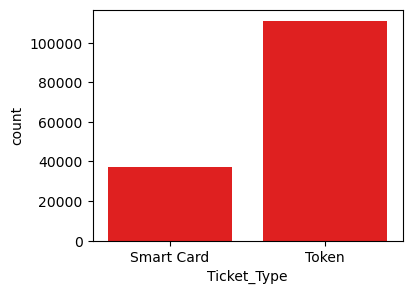

In [ ]:
plt.figure(figsize = (4,3)) # customizing the size of our countplot
sns.countplot(x="Ticket_Type", data=df, color = 'red') # main function
plt.show() # It shows the chart


## Next Step

Lets Undertand Frequency of data in column -"Ticket Type"

In [91]:
# Show counts of special values
print('Ticket_Type value counts (including null values):')  
print(df['Ticket_Type'].value_counts(dropna=False))

Ticket_Type value counts (including null values):
Ticket_Type
Token         111256
Smart Card     37244
NaN             1500
Name: count, dtype: int64


## Next step
ab remarks column mei jo blank values hai use check krte hai , thik hai ?

acha ruko , Passengers column bhi sath mei hi check kr lete hai ?

In [20]:
print('\nRemarks blanks count: ', (df['Remarks'] == '').sum())  # bhai isse apne ko blank values kitna hai ye pta chal jayega

print('\nPassengers null count: ', df['Passengers'].isna().sum())  # and bhai isse apne ko NA kitan hai ye pta chal jayega



Remarks blanks count:  0

Passengers null count:  1500


## 1) Trim whitespace and fix casing in `From_Station`

In [21]:
# Trim whitespace and title-case stations
print('Before sample:')
print(df['From_Station'].sample(8))  #chalo random 8 data utha ke check krte hai, iss column mei kya issue hai ?


Before sample:
29524                Mandi House
111096                 Old Delhi
22288                 Model Town
69114        Central Secretariat
101097           Barakhamba Road
74483              Kashmere Gate
20961                   Inderlok
18535             Janakpuri West
Name: From_Station, dtype: object


## Next step

chalo , isko clean kr dete hai, kyuki hame , "TRIM" , "upercase" ya "lowercase"  krna to ata hi hai , String jab padh rhe the tab bhi to sikha hi tha , hai na ?

In [22]:
df['From_Station'] = df['From_Station'].astype(str).str.strip().str.title()

| Part                 | Meaning                                                                             |
| -------------------- | ----------------------------------------------------------------------------------- |
| `df['From_Station']` | Selecting the column                                                                |
| `astype(str)`        | Convert data to string (in case any value is non-string)                            |
| `str.strip()`        | Remove **leading & trailing whitespace** (e.g. `" Rajiv Chowk "` → `"Rajiv Chowk"`) |
| `str.title()`        | Capitalize **first letter of each word** (e.g. `"rajiv chowk"` → `"Rajiv Chowk"`)   |


Ab to syntax bhi samjh mei aagya ... ? life kitna asan hai na ?  chalo ab wapas check krte hai , data clean hua ya nhi 

## Next step

check krte hai wapas koi bhi random value nikal ke from the same column

In [23]:
print('\nAfter sample:')
print(df['From_Station'].sample(8))


After sample:
105746       Jasola Vihar
70867           Hauz Khas
11286      Janakpuri West
138690    Barakhamba Road
21002           New Delhi
135927       Jasola Vihar
93751         Kirti Nagar
42199           Hauz Khas
Name: From_Station, dtype: object


## 2) Handle 'NA' strings in `Ticket_Type` and missing entries

| Problem                                            | Example        |
| -------------------------------------------------- | -------------- |
| Dataset has `'NA'` as text, not real missing value | `'NA'` ≠ `NaN` |
| We want real missing values                        | `'NA'` → `NaN` |


In [24]:
# Replace 'NA' string with actual NaN and then inspect
df['Ticket_Type'] = df['Ticket_Type'].replace('NA', np.nan)   # hn ji ham replace kr rhe hai "NA" ->"NAN"

print('Ticket_Type nulls:', df['Ticket_Type'].isna().sum())   # aur bas output check kr rhe hai 



Ticket_Type nulls: 1500


## Next step

ab jab hame , total null values pta chal hi gya hai , so lets replace them 

Par ek min ruko , kya apko pta hai 

Mean -> Average (Sabhi values ko jod kar total number of values se divide karna)

Median -> Middle value (Data ko ascending ya descending order mein sort karne ke baad jo beech ki value hoti hai)

Mode -> Highest Frequency (Wo value jo data mein sabse zyaada baar aati hai)

In [25]:
# Option: fill missing ticket types with 'Unknown' or the mode 
# matlab ye ki apne pass do option hai, ya to null ke jagah pe Unknown likh dete hai, ya phir , jo sabse jyda repeat hua hai wahi likh dete hai

mode_ticket = df['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)

# df['Ticket_Type'] = df['Ticket_Type'].fillna(mode_ticket)

Mode ticket type: Tourist Card


## 3) Convert blank `Remarks` to NaN

In [26]:
df['Remarks'] = df['Remarks'].replace('', np.nan)         # ye to simple hai, blank ko "NAN" se replace kr dete hai
print('Remarks nulls after conversion:', df['Remarks'].isna().sum())       #iss line se null ka count pta chal jayega

Remarks nulls after conversion: 26257


## 4) Handle missing `Passengers` values

Options:
- Impute with median or mean
- Drop rows (if only few)


In [27]:
# Example: impute with median passengers
median_pass = int(df['Passengers'].median(skipna=True))
print('Median passengers:', median_pass)

Median passengers: 20


## Next step

ab fill kr dete hai, jo median hamne calculate kiya hai , so we will replace null wiht median valuen now

In [28]:
df['Passengers'] = df['Passengers'].fillna(median_pass)

print('Passengers nulls after replacing:', df['Passengers'].isna().sum())

Passengers nulls after replacing: 0


## 5) Create `Profit` column

Profit per trip = (Fare - Cost_per_passenger) * Passengers

We'll create a `Profit` column and also a `Profit_per_passenger` for analysis.

In [29]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']
# Profit could be negative for subsidized trips -> keep as is
df['Profit'] = df['Profit_per_passenger'] * df['Passengers']


print('Profit of Delhi metro total =>', round(df['Profit'].sum(), 2)) # it uses simple round method
print('Profit of Delhi metro total =>',np.round(df['Profit'].sum(), 2)) # it uses numpy round method

Profit of Delhi metro total => 127941908.48
Profit of Delhi metro total => 127941908.48


## Next step - Our first milestone

Lets see hamse kya badhiya kaam kiya hai

In [30]:
#lets print individual column to see it clearly
print(df[['TripID','Fare','Cost_per_passenger','Passengers','Profit_per_passenger','Profit']].head())
print()
print(df.columns)
# lets also check total profit 
print('\nTotal profit across dataset:', df['Profit'].sum())

   TripID    Fare  Cost_per_passenger  Passengers  Profit_per_passenger  \
0   59771   77.99               18.27        13.0                 59.72   
1   21363   35.89               83.71        15.0                -47.82   
2  127325   64.35               43.70         9.0                 20.65   
3  140510  144.13               14.98        27.0                129.15   
4  144298  104.96               83.84        23.0                 21.12   

    Profit  
0   776.36  
1  -717.30  
2   185.85  
3  3487.05  
4   485.76  

Index(['TripID', 'Date', 'From_Station', 'To_Station', 'Distance_km', 'Fare',
       'Cost_per_passenger', 'Passengers', 'Ticket_Type', 'Remarks',
       'Profit_per_passenger', 'Profit'],
      dtype='object')

Total profit across dataset: 127941908.47999999


## 6) Save cleaned dataset (optional)

You can save the cleaned dataframe to a new CSV for further use.

In [31]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


## 7) Now lets Ploting charts to explore the data

Plots included:
1. Bar chart: top 10 stations by number of trips (From_Station)
2. Box plot: Fare distribution
3. Scatter plot: Distance vs Fare
4. Pie chart: Ticket_Type share
5. Histogram: Passengers distribution
6. Line chart: Total daily profit over time


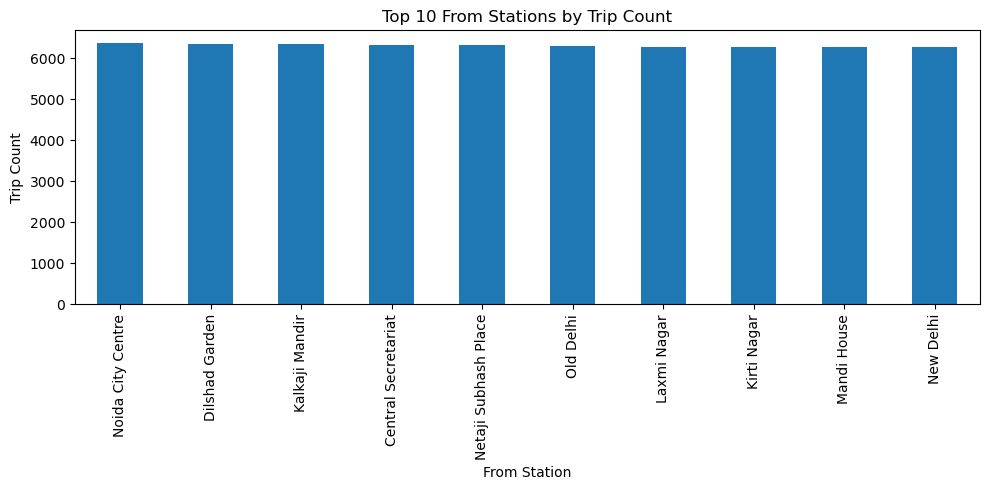

In [32]:
plt.figure(figsize=(10,5))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='bar')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('From Station')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

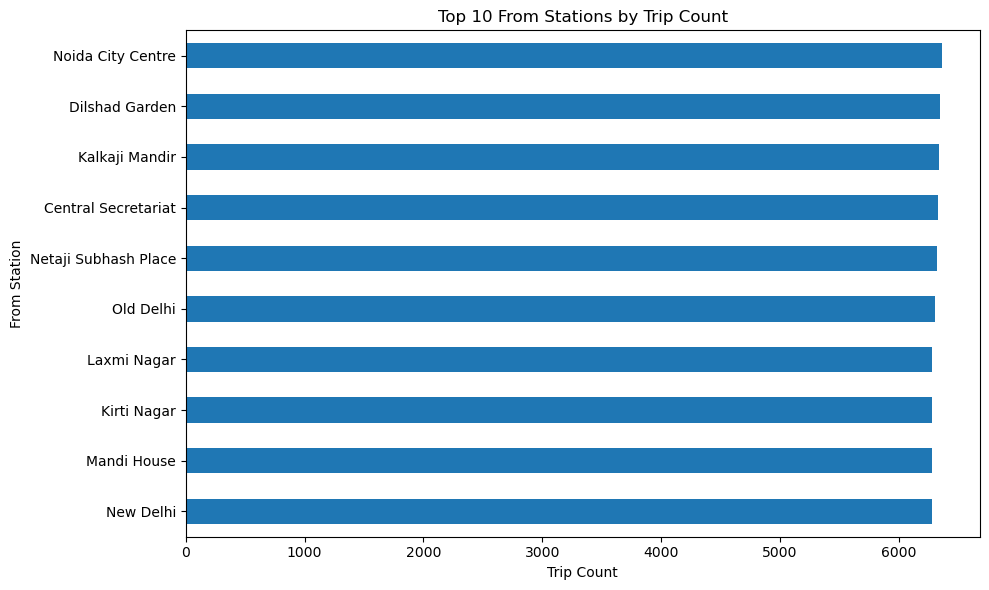

In [33]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)

station_counts.plot(kind='barh')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [34]:
# Create mask for first 90k rows where From_Station matches either name
mask = (
    (df.index < 90000) &
    (
        df["From_Station"].astype(str).str.strip().str.lower().isin([
            "old delhi",
            "kirti nagar"
        ])
    )
)

# Update those rows
df.loc[mask, "From_Station"] = "Noida City Centre"

In [35]:
print(df["From_Station"].value_counts().head(40))

From_Station
Noida City Centre       13949
Dilshad Garden           6344
Kalkaji Mandir           6338
Central Secretariat      6328
Netaji Subhash Place     6320
Laxmi Nagar              6281
New Delhi                6274
Mandi House              6274
Chandni Chowk            6262
Model Town               6247
Inderlok                 6246
Barakhamba Road          6239
Shivaji Park             6236
Rajouri Garden           6206
Janakpuri West           6205
Aiims                    6199
Kashmere Gate            6197
Rajiv Chowk              6192
Pragati Maidan           6192
Punjabi Bagh             6188
Hauz Khas                6183
Jasola Vihar             6099
Old Delhi                2515
Kirti Nagar              2486
Name: count, dtype: int64


## Total footfall

let calculate

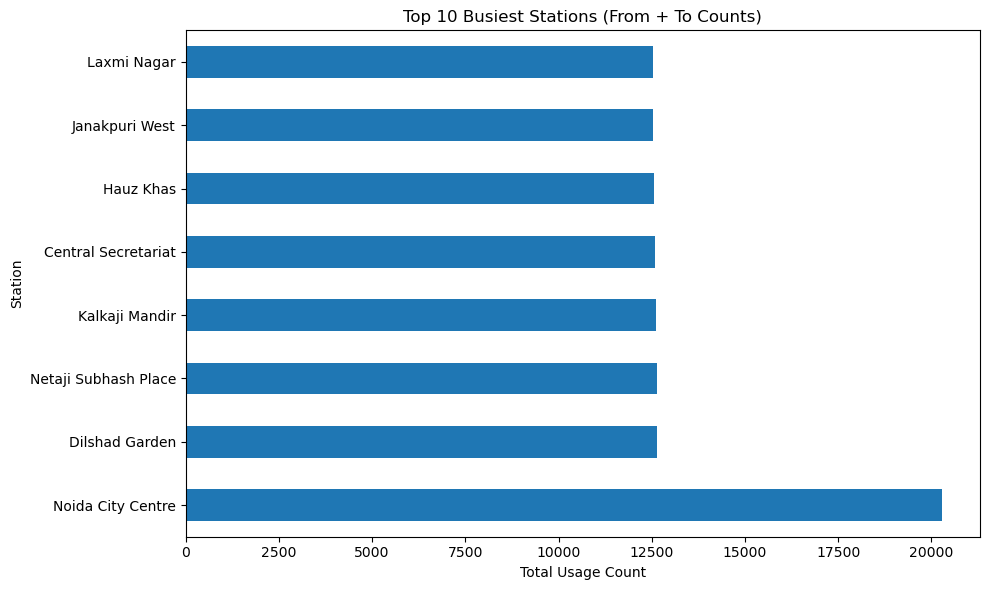

In [36]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)

total_station_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


### Top 5 From Stations by Trip Count with color gradient

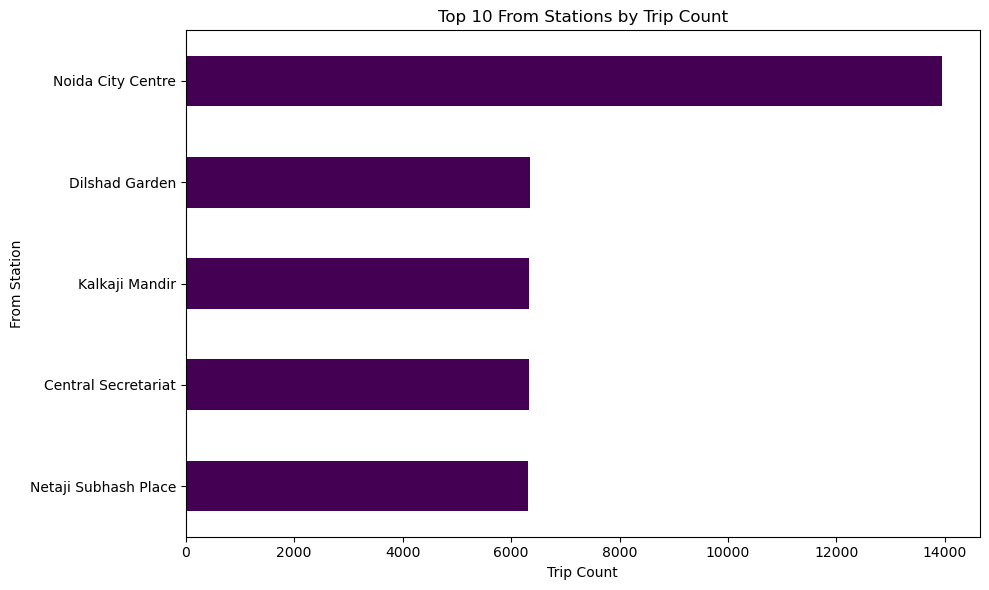

In [37]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(5)

bars = station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 10 From Stations by % Trip Contribution

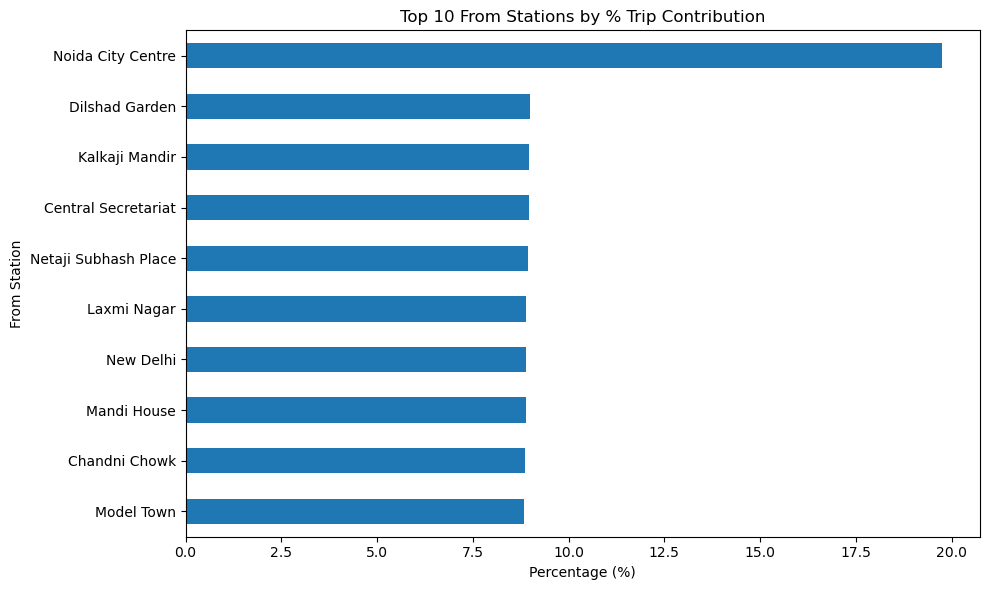

In [38]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100

station_pct.plot(kind='barh')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Plot all the above on a single canvas

C:\Users\Prerit\AppData\Local\Temp\ipykernel_18328\3409609318.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')


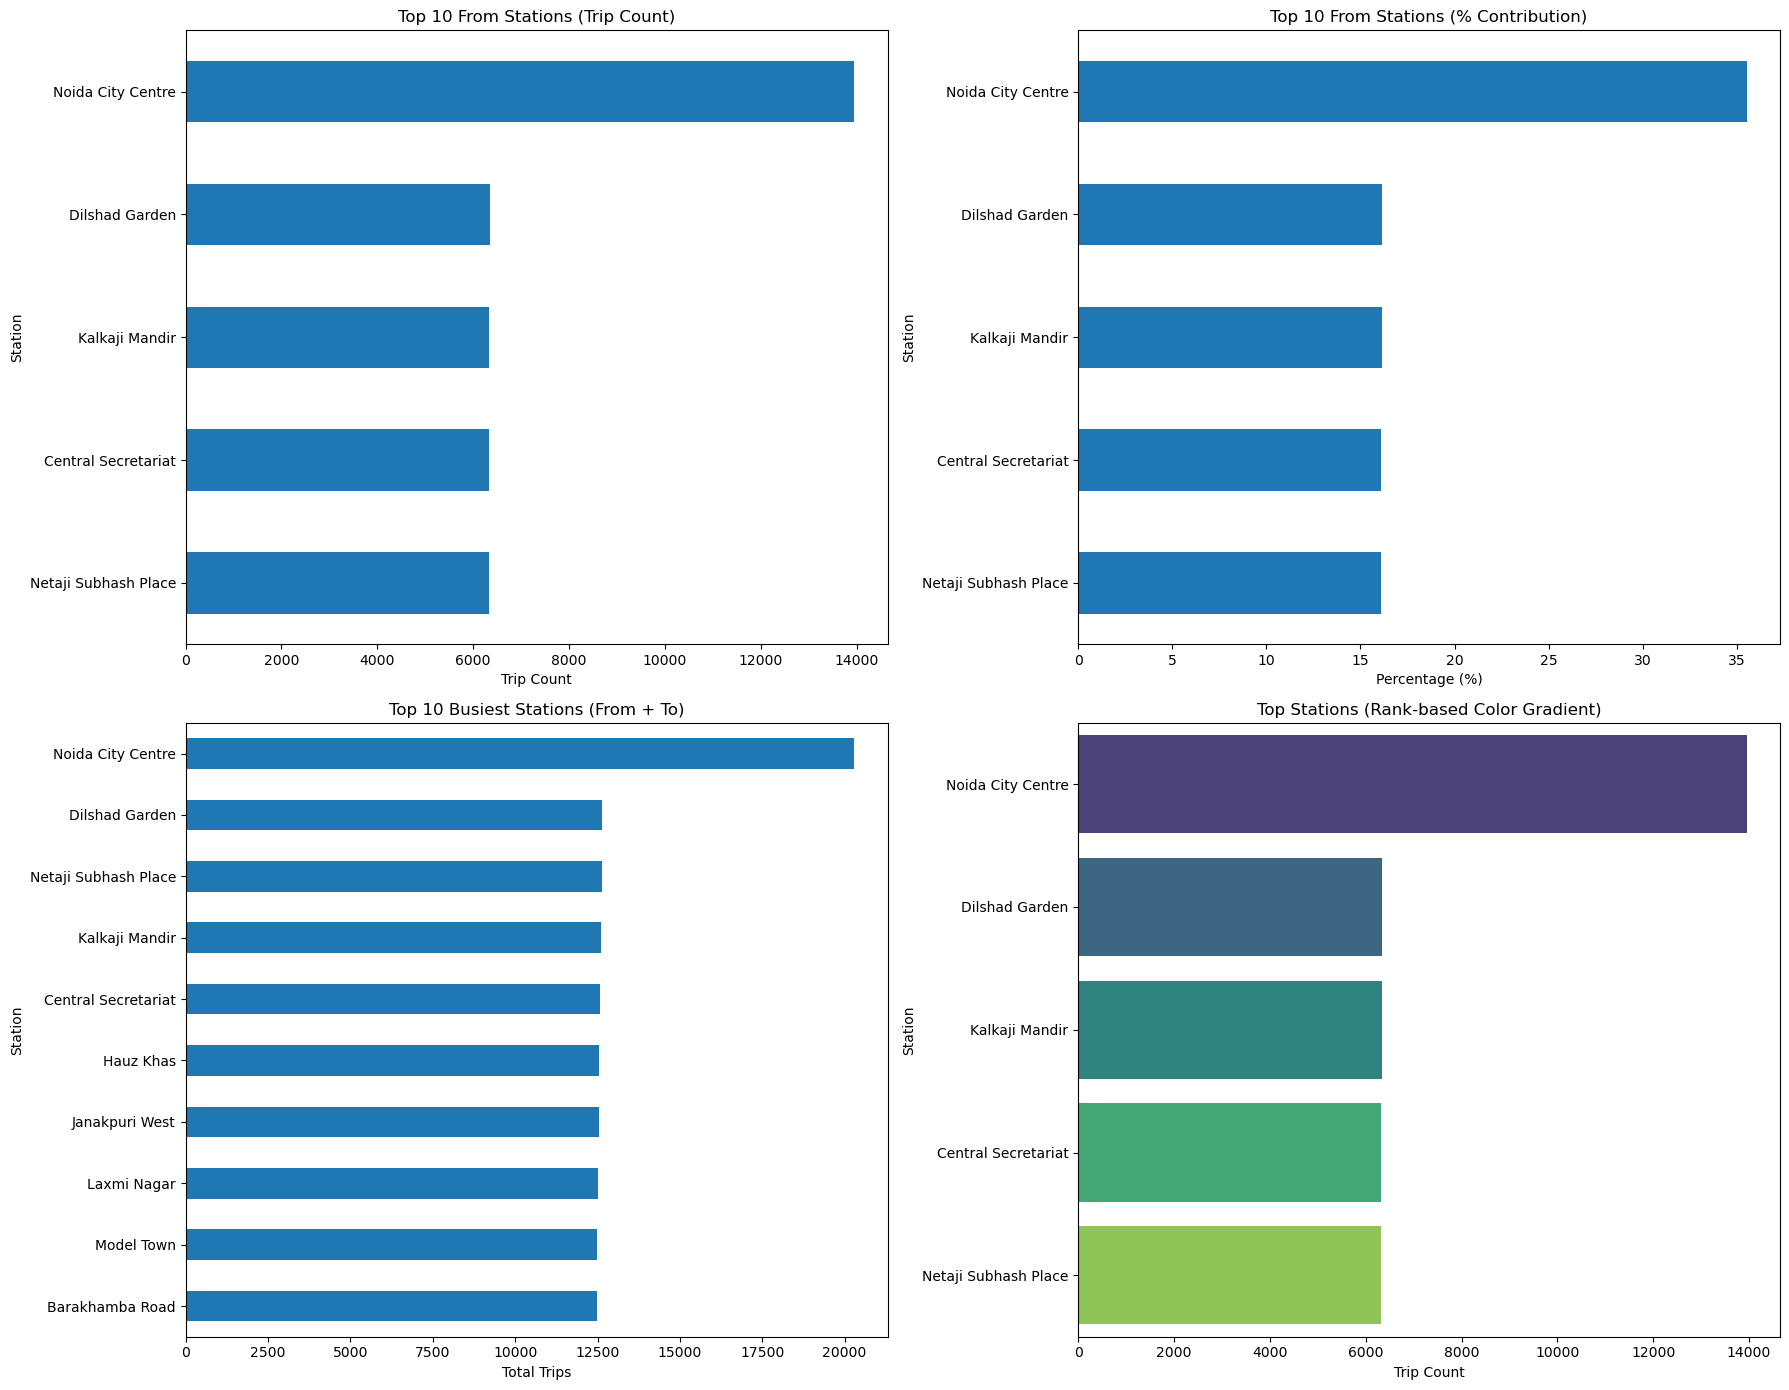

In [39]:
# Prepare data
from_counts = df['From_Station'].value_counts().nlargest(5)
from_pct = (from_counts / from_counts.sum()) * 100
total_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(10)

plt.figure(figsize=(18, 14))

# Chart 1: Top 10 From Stations (Count)
plt.subplot(2, 2, 1)
from_counts.plot(kind='barh')
plt.title('Top 10 From Stations (Trip Count)')
plt.xlabel('Trip Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 2: Percentage Contribution
plt.subplot(2, 2, 2)
from_pct.plot(kind='barh')
plt.title('Top 10 From Stations (% Contribution)')
plt.xlabel('Percentage (%)')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 3: Total Station Usage (From + To)
plt.subplot(2, 2, 3)
total_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To)')
plt.xlabel('Total Trips')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 4: Color Gradient Bar Chart for Ranking
plt.subplot(2, 2, 4)
sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')
plt.title('Top Stations (Rank-based Color Gradient)')
plt.xlabel('Trip Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


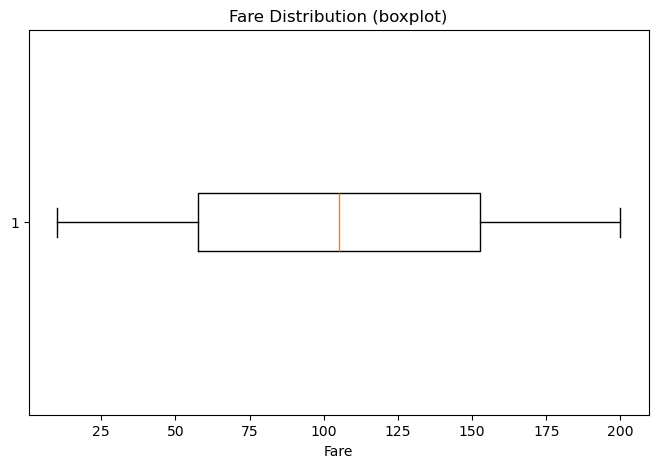

In [40]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

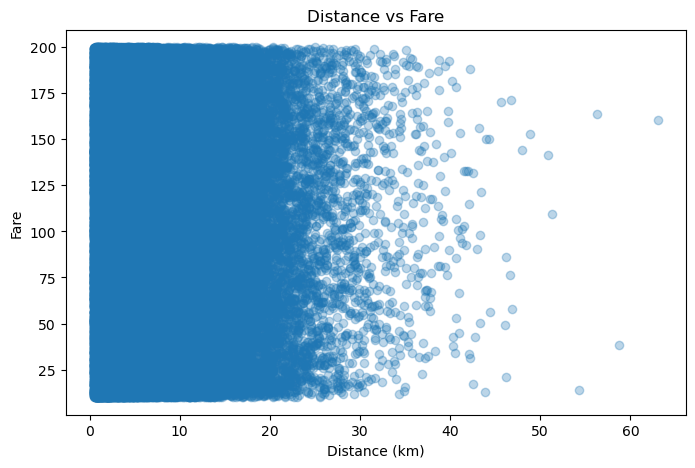

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'], alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

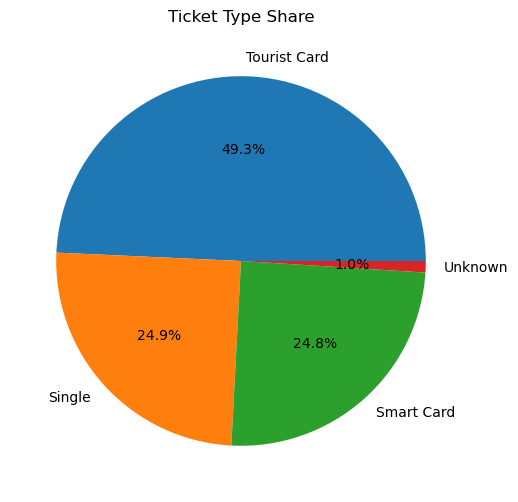

In [42]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

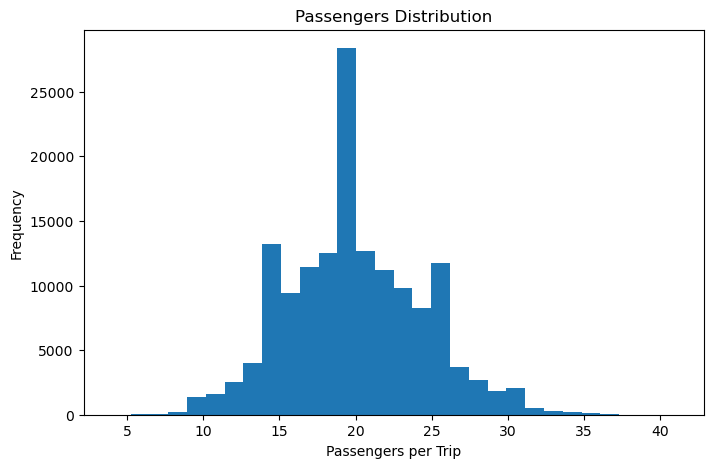

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'], bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

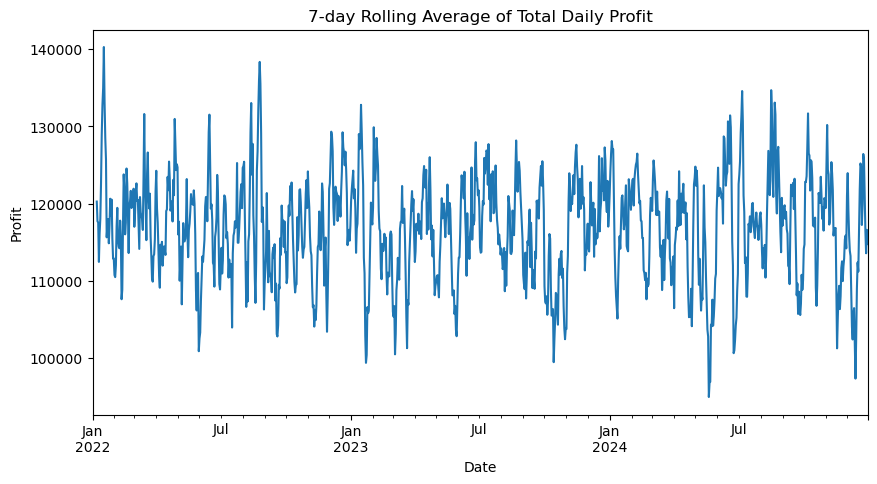

In [44]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

### Final notes

- The dataset is synthetic but realistic enough for practicing cleaning, imputation, trimming, and plotting.
- The notebook provides one example imputation (median). You can experiment with other strategies.
- Profit can be negative for trips where cost > fare, this is realistic for subsidized or low-ridership segments.


Keep practicing and exploring more and more projects
---
